## Name - Rishikesh Vadodaria

## Roll Number - C114

Aim -
Understand and apply the concepts of Markov Decision Processes (MDPs) by modelling a real-world decision-making scenario

a.	Model decision making process

b.	Implement Bellman Optimality Equation for value iteration algorithm

c.	Identify the optimal policy by analysing the results


In [1]:
pip install pymdptoolbox

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pymdptoolbox: filename=pymdptoolbox-4.0b3-py3-none-any.whl size=25668 sha256=7ff3d9da51df06232913dd0c9737ef22d07c104a3b99e7f3bfc61db445922ccb
  Stored in directory: c:\users\rishikesh\appdata\local\pip\cache\wheels\cc\81\b3\db002373e7a93d9151e9dc9ea1084102b0028f2339724b32a3
Successfully built pymdptoolbox
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the MDP parameters
states = ['Rainy', 'Cloudy', 'Sunny']
actions = ['Umbrella', 'No Umbrella']
rewards = {'Rainy': {'Umbrella': -1, 'No Umbrella': -5},
           'Cloudy': {'Umbrella': -1, 'No Umbrella': -1},
           'Sunny': {'Umbrella': -5, 'No Umbrella': -1}}
transitions = {'Rainy': {'Umbrella': {'Rainy': 0.7, 'Cloudy': 0.3, 'Sunny': 0},
                         'No Umbrella': {'Rainy': 0.3, 'Cloudy': 0.4, 'Sunny': 0.3}},
               'Cloudy': {'Umbrella': {'Rainy': 0.4, 'Cloudy': 0.6, 'Sunny': 0},
                          'No Umbrella': {'Rainy': 0, 'Cloudy': 0.7, 'Sunny': 0.3}},
               'Sunny': {'Umbrella': {'Rainy': 0, 'Cloudy': 0, 'Sunny': 1},
                         'No Umbrella': {'Rainy': 0, 'Cloudy': 0.4, 'Sunny': 0.6}}}
discount_factor = 0.9

In [4]:
#Fn for value iter
def value_iteration():
    #init, the value fn for each state to 0
    V = {s: 0 for s in states}
    while True:
        #compute the updated value fn for each state
        new_V = {}
        for s in states:
            values = []
            for a in actions:
                value = rewards[s][a]
                for s2 in states:
                    value += discount_factor * transitions[s][a][s2] * V[s2]
                values.append(value)
            new_V[s] = max(values)
        # Check convergence
        if all(abs(V[s] - new_V[s]) < 0.0001 for s in states):
            return new_V
        V = new_V
V = value_iteration()

Optimal policy:
{'Rainy': 'Umbrella', 'Cloudy': 'Umbrella', 'Sunny': 'No Umbrella'}


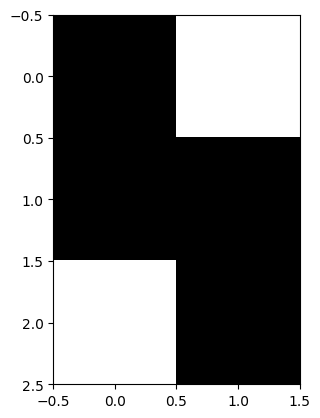

In [5]:
#compute optimal policy
policy = {}
for s in states:
    values = []
    for a in actions:
        value = rewards[s][a]
        for s2 in states:
            value += discount_factor * transitions[s][a][s2] * V[s2]
        values.append(value)
    policy[s] = actions[np.argmax(values)]

print("Optimal policy:")
print(policy)

# Plot
policy_values = np.zeros((len(states), len(actions)))
for i, s in enumerate(states):
    for j, a in enumerate(actions):
        policy_values[i, j] = rewards[s][a] + discount_factor * sum(transitions[s][a][s2] * V[s2] for s2 in states)
plt.imshow(policy_values, cmap='Greys')

### Custom Example

In [6]:
# Define the MDP parameters for the Mining Environment (Diamond and Coal)
grid_size = 4
states = [(i, j) for i in range(grid_size) for j in range(grid_size)]  # All positions in a 4x4 grid
actions = ['Up', 'Down', 'Left', 'Right', 'Mine']

In [7]:
# Rewards and transition functions
diamond_locations = [(1, 1), (3, 0)]  # Diamond locations
coal_locations = [(0, 2), (2, 3)]  # Coal locations
empty_locations = [(i, j) for i in range(grid_size) for j in range(grid_size)]  # All possible states

In [8]:
# Define rewards
rewards = {}
for state in states:
    if state in diamond_locations:
        rewards[state] = 10  # Reward for finding a diamond
    elif state in coal_locations:
        rewards[state] = 1   # Reward for finding coal
    else:
        rewards[state] = -1  # Small penalty for mining in an empty spot


In [9]:
# Transition function
def get_next_state(state, action):
    x, y = state
    if action == 'Up' and x > 0:
        return (x - 1, y)
    if action == 'Down' and x < grid_size - 1:
        return (x + 1, y)
    if action == 'Left' and y > 0:
        return (x, y - 1)
    if action == 'Right' and y < grid_size - 1:
        return (x, y + 1)
    return state  # If blocked, return the same state


In [10]:
# Define the discount factor
discount_factor = 0.9

In [11]:
# Value iteration function
def value_iteration():
    # Initialize the value function to zeros
    V = {state: 0 for state in states}

    while True:
        # Compute the updated value function for each state
        new_V = {}
        for state in states:
            values = []
            # If the agent is in an empty location or it's a terminal state, skip mining
            if state in empty_locations:
                # Consider movement actions (not mining)
                for action in actions[:-1]:  # Exclude 'Mine' from movement actions
                    next_state = get_next_state(state, action)
                    value = rewards[state] + discount_factor * V[next_state]
                    values.append(value)
            else:
                # Consider movement and mining actions
                for action in actions:
                    if action == 'Mine':
                        value = rewards[state] + discount_factor * V[state]  # No transition, remains in same state
                    else:
                        next_state = get_next_state(state, action)
                        value = rewards[state] + discount_factor * V[next_state]
                    values.append(value)
            new_V[state] = max(values)

        # Check convergence (if the change is below a small threshold)
        if all(abs(V[state] - new_V[state]) < 0.0001 for state in states):
            return new_V
        V = new_V

In [12]:
# Compute the optimal value function
V = value_iteration()

# Compute the optimal policy based on the value function
policy = {}
for state in states:
    values = []
    for action in actions:
        if action == 'Mine':
            value = rewards[state] + discount_factor * V[state]  # No transition
        else:
            next_state = get_next_state(state, action)
            value = rewards[state] + discount_factor * V[next_state]
        values.append(value)
    policy[state] = actions[np.argmax(values)]

# Print the optimal policy
print("Optimal Policy:")
for i in range(grid_size):
    row = []
    for j in range(grid_size):
        state = (i, j)
        if state in diamond_locations:
            row.append('D')  # Diamond
        elif state in coal_locations:
            row.append('C')  # Coal
        elif state in empty_locations:
            row.append('E')  # Empty space
        else:
            row.append(policy[state][0])  # First letter of the optimal action
    print(row)

Optimal Policy:
['E', 'E', 'C', 'E']
['E', 'D', 'E', 'E']
['E', 'E', 'E', 'C']
['D', 'E', 'E', 'E']


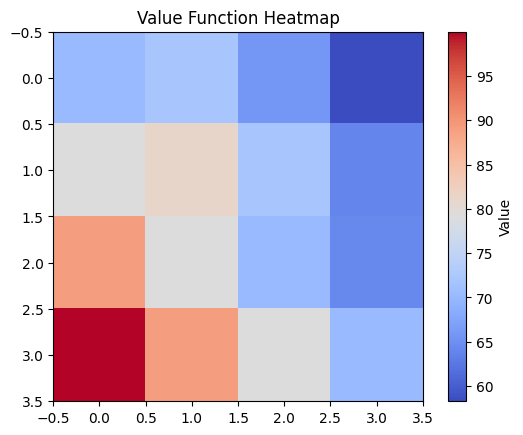

In [13]:
# Plot the value function on the grid
V_grid = np.zeros((grid_size, grid_size))
for state, value in V.items():
    V_grid[state[0], state[1]] = value

plt.imshow(V_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Value")
plt.title("Value Function Heatmap")
plt.show()

